In [92]:
import numpy as np
import time
from matplotlib import pyplot as plt

In [110]:
def strassen(a,b):
    # рекурсивное вычисление произведения матриц при помощи алгоритма Штрассена   
    # если матрица не 2**n x 2**n, то допишем нули в функции
    if not ((a.shape[0] == a.shape[1] == b.shape[0] == b.shape[1]) and (np.log2(a.shape[0])%1==0)):
        a,b = make_them_powers(a,b)
    
    n = a.shape[0]
    
    if n == 1:
        return a*b
    
    m = n//2 # размер подматрицы
        
    a11 = a[:m,:m]
    a12 = a[:m,m:]
    a21 = a[m:,:m]
    a22 = a[m:,m:]
    
    b11 = b[:m,:m]
    b12 = b[:m,m:]
    b21 = b[m:,:m]
    b22 = b[m:,m:]
    
    p1 = strassen(a11+a22,b11+b22)
    p2 = strassen(a21+a22,b11)
    p3 = strassen(a11,b12-b22)
    p4 = strassen(a22,b21-b11)
    p5 = strassen(a11+a12,b22)
    p6 = strassen(a21-a11,b11+b12)
    p7 = strassen(a12-a22,b21+b22)
    
    c11 = p1 + p4 - p5 + p7
    c12 = p3 + p5
    c21 = p2 + p4
    c22 = p1 - p2 + p3 + p6
    
    c = np.zeros((n,n))
    
    c[:m,:m] = c11
    c[:m,m:] = c12
    c[m:,:m] = c21
    c[m:,m:] = c22
    
    return c

def make_them_powers(a,b):
    # возвращает две матрицы 2**n x 2**n с минимальным n: они содержат в себе матрицы A и B, остальные элементы - нули
    
    assert(a.shape[1]==b.shape[0])
    
    max_n = np.max([*a.shape,*b.shape])
    
    n = np.int32(2**(np.ceil(np.log2(max_n))))
    
    new_a = np.zeros((n,n))
    new_b = np.zeros((n,n))
    
    new_a[:a.shape[0],:a.shape[1]] = a
    new_b[:a.shape[0],:a.shape[1]] = b
    
    return new_a, new_b

In [107]:
def dumb_recursive(a,b):
    # рекурсивное вычисление произведения матриц при помощи алгоритма Штрассена
    # если матрица не 2**n x 2**n, то допишем нули в функции
    if not ((a.shape[0] == a.shape[1] == b.shape[0] == b.shape[1]) and (np.log2(a.shape[0])%1==0)):
        a,b = make_them_powers(a,b)
    
    n = a.shape[0]
    
    if n == 1:
        return a*b
    
    m = n//2 # размер подматрицы
        
    a11 = a[:m,:m]
    a12 = a[:m,m:]
    a21 = a[m:,:m]
    a22 = a[m:,m:]
    
    b11 = b[:m,:m]
    b12 = b[:m,m:]
    b21 = b[m:,:m]
    b22 = b[m:,m:]
    
    c11 = dumb_recursive(a11,b11) + dumb_recursive(a12,b21)
    c12 = dumb_recursive(a11,b12) + dumb_recursive(a12,b22)
    c21 = dumb_recursive(a21,b11) + dumb_recursive(a22,b21)
    c22 = dumb_recursive(a21,b12) + dumb_recursive(a22,b22)
    
    c = np.zeros((n,n))
    
    c[:m,:m] = c11
    c[:m,m:] = c12
    c[m:,:m] = c21
    c[m:,m:] = c22
    
    return c

In [108]:
def dumb(a,b):    
    m, d = a.shape
    d1, n  = b.shape
    
    assert(d==d1)
    
    c = np.zeros((m,n))
    
    for i in range(m):
        for j in range(n):
            for k in range(d):
                c[i,j] += a[i,k]*b[k,j]
            
    return c

In [147]:
a = np.random.rand(2,2)
b = np.random.rand(2,2)

In [148]:
a@b

array([[0.73977596, 0.81500659],
       [0.78321811, 0.83286316]])

In [149]:
strassen(a,b)

array([[0.73977596, 0.81500659],
       [0.78321811, 0.83286316]])

In [150]:
dumb_recursive(a,b)

array([[0.73977596, 0.81500659],
       [0.78321811, 0.83286316]])

In [151]:
dumb(a,b)

array([[0.73977596, 0.81500659],
       [0.78321811, 0.83286316]])

In [153]:
strassen_times = []
for i in range(1,6):
    total_time = 0
    for j in range(10):
        rand_a = np.random.rand(2**i,2**i)
        rand_b = np.random.rand(2**i,2**i)
        start = time.time()
        strassen(rand_a,rand_b)
        end = time.time()
        total_time+=end-start
    strassen_times.append(total_time)

In [154]:
dumb_recursive_times = []
for i in range(1,6):
    total_time = 0
    for j in range(10):
        rand_a = np.random.rand(2**i,2**i)
        rand_b = np.random.rand(2**i,2**i)
        start = time.time()
        dumb_recursive(rand_a,rand_b)
        end = time.time()
        total_time+=end-start
    dumb_recursive_times.append(total_time)

In [155]:
dumb_times = []
for i in range(1,6):
    total_time = 0
    for j in range(10):
        rand_a = np.random.rand(2**i,2**i)
        rand_b = np.random.rand(2**i,2**i)
        start = time.time()
        dumb(rand_a,rand_b)
        end = time.time()
        total_time+=end-start
    dumb_times.append(total_time)

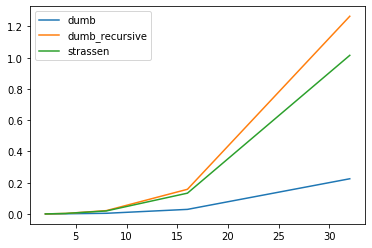

In [165]:
plt.plot(2**np.arange(1,6),dumb_times)
plt.plot(2**np.arange(1,6),dumb_recursive_times)
plt.plot(2**np.arange(1,6),strassen_times)
plt.legend(['dumb','dumb_recursive','strassen'])